In [19]:
from habanero import Crossref
from pprint import pprint
cr = Crossref(mailto = "htw2116@columbia.edu")

In [20]:
n = 50
journal_ISSN = "1471-2105"
journal_papers = cr.journals(ids = journal_ISSN, works = True, limit = n)
pprint(journal_papers)

{'message': {'facets': {},
             'items': [{'DOI': '10.1186/1471-2105-15-86',
                        'ISSN': ['1471-2105'],
                        'URL': 'http://dx.doi.org/10.1186/1471-2105-15-86',
                        'alternative-id': ['6829'],
                        'article-number': '86',
                        'author': [{'affiliation': [],
                                    'family': 'Ryslik',
                                    'given': 'Gregory A',
                                    'sequence': 'first'},
                                   {'affiliation': [],
                                    'family': 'Cheng',
                                    'given': 'Yuwei',
                                    'sequence': 'additional'},
                                   {'affiliation': [],
                                    'family': 'Cheung',
                                    'given': 'Kei-Hoi',
                                    'sequence': 'additional'},
        

                                       'first-page': '217',
                                       'issue': '3',
                                       'journal-title': 'Cancer Cell',
                                       'key': '6829_CR53',
                                       'unstructured': 'Yun CH, Boggon TJ, Li '
                                                       'Y, Woo MS, Greulich H, '
                                                       'Meyerson M, Eck MJ: '
                                                       'Structures of lung '
                                                       'cancer-derived egfr '
                                                       'mutants and inhibitor '
                                                       'complexes: mechanism '
                                                       'of activation and '
                                                       'insights into '
                                                       '

                                       'key': '5935_CR5',
                                       'unstructured': 'Bardelli A, Parsons '
                                                       'DW, Silliman N, Ptak '
                                                       'J, Szabo S, Saha S, '
                                                       'Markowitz S, Willson '
                                                       'JKV, Parmigiani G, '
                                                       'Kinzler KW, Vogelstein '
                                                       'B, Velculescu VE: '
                                                       'Mutational analysis of '
                                                       'the tyrosine kinome in '
                                                       'colorectal cancers. '
                                                       'Sci (New York, N.Y.). '
                                                       '2003, 300 (5621): 

                                      {'DOI': '10.2174/138920009788897975',
                                       'author': 'JT Hartmann',
                                       'doi-asserted-by': 'crossref',
                                       'first-page': '470',
                                       'issue': '5',
                                       'journal-title': 'Curr Drug Metab',
                                       'key': '963_CR3',
                                       'unstructured': 'Hartmann JT, Haap M, '
                                                       'Kopp H-G, Lipp H-P. '
                                                       'Tyrosine kinase '
                                                       'inhibitors - a review '
                                                       'on pharmacology, '
                                                       'metabolism and side '
                                                       'effects. Curr Drug '
    

                                       'author': 'JT Hartmann',
                                       'doi-asserted-by': 'publisher',
                                       'first-page': '470',
                                       'issue': '5',
                                       'journal-title': 'Curr Drug Metab',
                                       'key': '6507_CR3',
                                       'unstructured': 'Hartmann JT, Haap M, '
                                                       'Kopp HG, Lipp HP: '
                                                       'Tyrosine kinase '
                                                       'inhibitors - a review '
                                                       'on pharmacology, '
                                                       'metabolism and side '
                                                       'effects. Curr Drug '
                                                       'Metab. 2009, 10 (5): '
 

                                   {'affiliation': [],
                                    'family': 'Tsang',
                                    'given': 'John S',
                                    'sequence': 'additional'}],
                        'container-title': ['BMC Bioinformatics'],
                        'content-domain': {'crossmark-restriction': False,
                                           'domain': ['link.springer.com']},
                        'created': {'date-parts': [[2019, 4, 16]],
                                    'date-time': '2019-04-16T15:04:04Z',
                                    'timestamp': 1555427044000},
                        'deposited': {'date-parts': [[2019, 4, 16]],
                                      'date-time': '2019-04-16T15:05:03Z',
                                      'timestamp': 1555427103000},
                        'indexed': {'date-parts': [[2019, 4, 16]],
                                    'date-time': '2019-04-16T15:41:23

                                       'first-page': '1249',
                                       'journal-title': 'J Med Virol',
                                       'key': '2793_CR47',
                                       'unstructured': 'Cai XY, Wang Q, Lin '
                                                       'GY, Cai ZW, Lin CX, '
                                                       'Chen PZ, et '
                                                       'al.Respiratory Virus '
                                                       'Infections Among '
                                                       'Children in South '
                                                       'China. J Med Virol. '
                                                       '2014; 86:1249–55.',
                                       'volume': '86',
                                       'year': '2014'},
                                      {'DOI': '10.1111/irv.12229',
                     

                        'source': 'Crossref',
                        'subject': ['Biochemistry',
                                    'Applied Mathematics',
                                    'Molecular Biology',
                                    'Structural Biology',
                                    'Computer Science Applications'],
                        'title': ['ProPhylo: partial phylogenetic profiling to '
                                  'guide protein family construction and '
                                  'assignment of biological process'],
                        'type': 'journal-article',
                        'volume': '12'},
                       {'DOI': '10.1186/1471-2105-14-s5-s1',
                        'ISSN': ['1471-2105'],
                        'URL': 'http://dx.doi.org/10.1186/1471-2105-14-s5-s1',
                        'alternative-id': ['1471-2105-14-S5-S1'],
                        'author': [{'affiliation': [],
                               

                                          'published-print': {'date-parts': [[2007]]}},
                        'language': 'en',
                        'member': '297',
                        'page': '419',
                        'prefix': '10.1186',
                        'published-print': {'date-parts': [[2007]]},
                        'publisher': 'Springer Nature',
                        'reference-count': 0,
                        'references-count': 0,
                        'score': 1.0,
                        'short-container-title': ['BMC Bioinformatics'],
                        'source': 'Crossref',
                        'title': ['A dynamic programming approach for the '
                                  'alignment of signal peaks in multiple gas '
                                  'chromatography-mass spectrometry '
                                  'experiments'],
                        'type': 'journal-article',
                        'volume': '8'},
    

                                       'key': '2779_CR70',
                                       'unstructured': 'Bard JBL, Rhee SY. '
                                                       'Ontologies in biology: '
                                                       'design, applications '
                                                       'and future challenges. '
                                                       'Nat Rev Genet. 2004; '
                                                       '5(3):213–22.',
                                       'volume': '5',
                                       'year': '2004'},
                                      {'DOI': '10.1016/j.ins.2008.11.017',
                                       'author': 'U Dogrusoz',
                                       'doi-asserted-by': 'crossref',
                                       'first-page': '980',
                                       'issue': '7',
                                       'jo

                                       'author': 'JD Keene',
                                       'doi-asserted-by': 'publisher',
                                       'first-page': '533',
                                       'journal-title': 'Nat Rev Genet',
                                       'key': '691_CR5',
                                       'unstructured': 'Keene JD. RNA '
                                                       'regulons: coordination '
                                                       'of '
                                                       'post-transcriptional '
                                                       'events. Nat Rev Genet. '
                                                       '2007;8:533–43.',
                                       'volume': '8',
                                       'year': '2007'},
                                      {'DOI': '10.1038/nature01363',
                                       'doi-asserted

                                       'key': '5666_CR5',
                                       'unstructured': 'Altshuler D, Pollara '
                                                       'VJ, Cowles CR, Van '
                                                       'Etten WJ, Baldwin J, '
                                                       'Linton L, Lander ES: '
                                                       'An SNP map of the '
                                                       'human genome generated '
                                                       'by reduced '
                                                       'representation shotgun '
                                                       'sequencing. Nature '
                                                       '2000,407(6803):513-516. '
                                                       '10.1038/35035083',
                                       'volume': '407',
                               

                                       'year': '2007'},
                                      {'DOI': '10.1080/10236240600980640',
                                       'author': 'MO Amsler',
                                       'doi-asserted-by': 'publisher',
                                       'first-page': '259',
                                       'issue': '4',
                                       'journal-title': 'Mar Freshw Behav '
                                                        'Physiol',
                                       'key': '5665_CR10',
                                       'unstructured': 'Amsler MO, Amsler CD, '
                                                       'Rittschof D, Becerro '
                                                       'MA, McClintock JB: The '
                                                       'use of '
                                                       'computer-assisted '
                                        

                                       'year': '2010'},
                                      {'DOI': '10.1126/science.1158441',
                                       'author': 'U Nagalakshmi',
                                       'doi-asserted-by': 'publisher',
                                       'first-page': '1344',
                                       'journal-title': 'Science',
                                       'key': '5793_CR24',
                                       'unstructured': 'Nagalakshmi U, Wang Z, '
                                                       'Waem K, Shou C, Raha '
                                                       'D, Gerstein M, Snyder '
                                                       'M: The transcriptional '
                                                       'lanscape of the yeast '
                                                       'genome defined by RNA '
                                                       'sequencing

                                       'first-page': '69',
                                       'issue': '1',
                                       'journal-title': 'Nucleic Acids '
                                                        'Research',
                                       'key': '5224_CR23',
                                       'unstructured': 'Dwight SS: '
                                                       'Saccharomyces Genome '
                                                       'Database provides '
                                                       'secondary gene '
                                                       'annotation using the '
                                                       'Gene Ontology. Nucleic '
                                                       'Acids Research. 2002, '
                                                       '30 (1): 69-72. '
                                                       '10.1093/nar/30.1.69.',

                                                       '82 (2): 165-174.',
                                       'volume': '82',
                                       'year': '1999'},
                                      {'DOI': '10.1016/S0168-9525(03)00175-6',
                                       'author': 'H Yu',
                                       'doi-asserted-by': 'publisher',
                                       'first-page': '422',
                                       'journal-title': 'Trends Genet',
                                       'key': '5887_CR25',
                                       'unstructured': 'Yu H, Luscombe N, Qian '
                                                       'J, Gerstein M: Genomic '
                                                       'analysis of gene '
                                                       'expression '
                                                       'relationships in '
                                   

                                       'journal-title': 'J Proteome Res',
                                       'key': '5865_CR23',
                                       'unstructured': 'Gupta N, Pevzner PA: '
                                                       'False discovery rates '
                                                       'of protein '
                                                       'identifications: a '
                                                       'strike against the '
                                                       'two-peptide rule. J '
                                                       'Proteome Res. 2009, 8: '
                                                       '4173-4181. '
                                                       '10.1021/pr9004794.',
                                       'volume': '8',
                                       'year': '2009'},
                                      {'DOI': '10.1002/pmic.200900375'

                                      {'DOI': '10.1109/TSP.2008.917851',
                                       'author': 'N Dobigeon',
                                       'doi-asserted-by': 'publisher',
                                       'first-page': '2684',
                                       'issue': '7',
                                       'journal-title': 'IEEE Trans Signal '
                                                        'Process',
                                       'key': '5920_CR26',
                                       'unstructured': 'Dobigeon N, Tourneret '
                                                       'JY, Chang CI: '
                                                       'Semi-supervised linear '
                                                       'spectral unmixing '
                                                       'using a hierarchical '
                                                       'Bayesian model for '
           

                                       'year': '1996'},
                                      {'DOI': '10.1038/nbt0808-864',
                                       'author': 'L Montecchi-Palazzi',
                                       'doi-asserted-by': 'publisher',
                                       'first-page': '864',
                                       'issue': '8',
                                       'journal-title': 'Nat Biotechnol',
                                       'key': '5883_CR26',
                                       'unstructured': 'Montecchi-Palazzi L, '
                                                       'Beavis R, Binz PA, '
                                                       'Chalkley RJ, Cottrell '
                                                       'J, Creasy D, Shofstahl '
                                                       'J, Seymour SL, '
                                                       'Garavelli JS: The '
                    

                        'created': {'date-parts': [[2013, 3, 24]],
                                    'date-time': '2013-03-24T03:14:18Z',
                                    'timestamp': 1364094858000},
                        'deposited': {'date-parts': [[2019, 1, 22]],
                                      'date-time': '2019-01-22T10:40:20Z',
                                      'timestamp': 1548153620000},
                        'indexed': {'date-parts': [[2019, 2, 13]],
                                    'date-time': '2019-02-13T01:07:07Z',
                                    'timestamp': 1550020027180},
                        'is-referenced-by-count': 13,
                        'issn-type': [{'type': 'electronic',
                                       'value': '1471-2105'}],
                        'issue': '1',
                        'issued': {'date-parts': [[2013, 3, 24]]},
                        'journal-issue': {'issue': '1',
                                        

In [21]:
for paper in journal_papers["message"]["items"]:
    print("Title: " + paper["title"][0])
    print("DOI: " + paper["DOI"])
    first_author = None
    for author in paper["author"]:
        if author["sequence"] == "first":
            first_author = author["given"] + " " + author["family"]
            break
    print("First Author: " + first_author)

Title: A graph theoretic approach to utilizing protein structure to identify non-random somatic mutations
DOI: 10.1186/1471-2105-15-86
First Author: Gregory A Ryslik
Title: Utilizing protein structure to identify non-random somatic mutations
DOI: 10.1186/1471-2105-14-190
First Author: Gregory A Ryslik
Title: Leveraging protein quaternary structure to identify oncogenic driver mutations
DOI: 10.1186/s12859-016-0963-3
First Author: Gregory A. Ryslik
Title: A spatial simulation approach to account for protein structure when identifying non-random somatic mutations
DOI: 10.1186/1471-2105-15-231
First Author: Gregory A Ryslik
Title: eNetXplorer: an R package for the quantitative exploration of elastic net families for generalized linear models
DOI: 10.1186/s12859-019-2778-5
First Author: Julián Candia
Title: Effect of stochasticity on coinfection dynamics of respiratory viruses
DOI: 10.1186/s12859-019-2793-6
First Author: Lubna Pinky
Title: ProPhylo: partial phylogenetic profiling to guide 

In [34]:
from graph_tool.all import *

journal_graph = Graph()
vertex_id = journal_graph.new_vertex_property("string")

journal_root = journal_graph.add_vertex()
vertex_id[journal_root] = journal_ISSN

for paper in journal_papers["message"]["items"]:
    paper_vertex = journal_graph.add_vertex()
    vertex_id[paper_vertex] = paper["DOI"]
    journal_graph.add_edge(paper_vertex, journal_root)

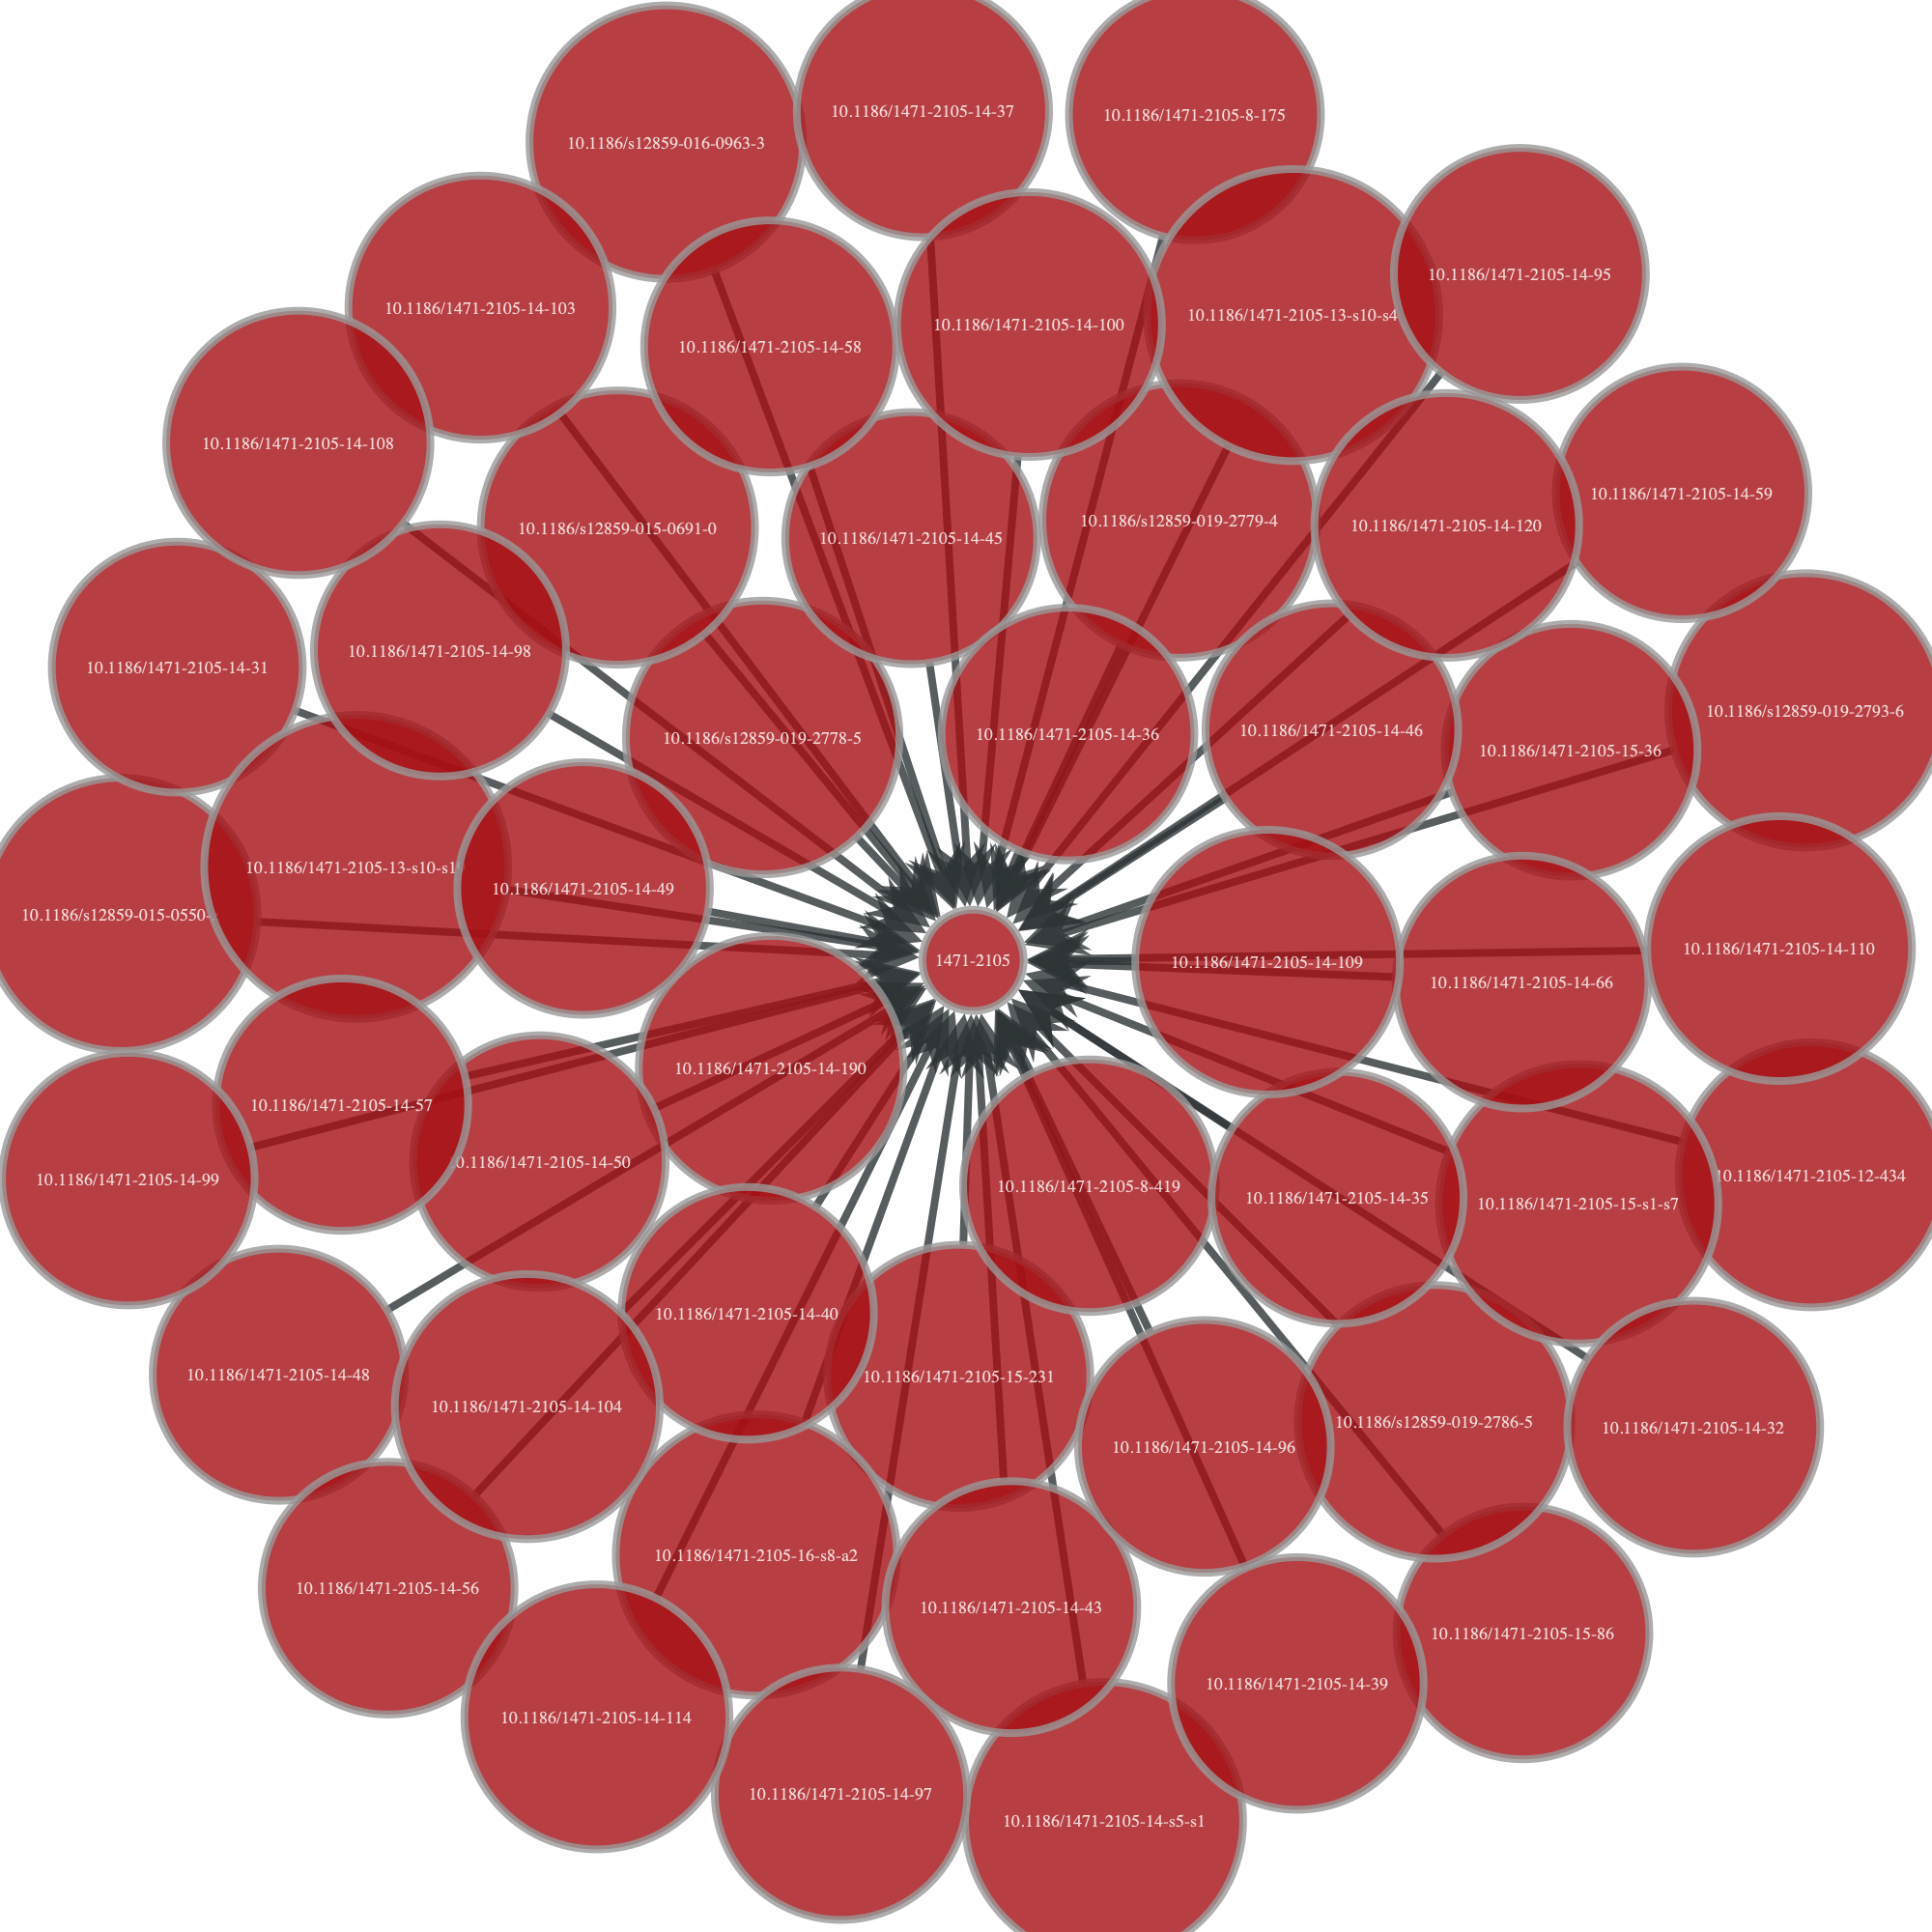

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1538fb588, at 0x153925978>

In [33]:
journal_graph.vp.id = vertex_id
graph_draw(journal_graph, vertex_text = journal_graph.vp.id, 
           output_size = (2000,2000), vertex_font_size = 18, 
           bg_color = [1,1,1,1])